# REINFORCEMENT LEARNING PROJECT : 
# RINO AI 

In [184]:
%pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [179]:
# mss is used to capture the screen
from mss import mss
#used for sending commands
import pyautogui
# opencv for frame processing
import cv2
# transformational framework
import numpy as np
# ocr for "game over" extraction
import pytesseract
# visualize captured frames
from matplotlib import pyplot as plt
# for pauses 
# (between send commands and waiting
# for the frames to change)
import time
import os


# Environment components
from gym import Env
from gym.spaces import Box, Discrete

In [180]:
print(os.environ['PATH'])
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'


/home/enosim/anaconda3/envs/rl/bin:/home/enosim/anaconda3/condabin:/app/bin:/app/bin:/app/bin:/usr/bin:/home/enosim/.var/app/com.visualstudio.code/data/node_modules/bin


## BUILDING ENVIRONMENT

In [181]:
class WebGame(Env):
    # setup teh environment action and observation shapes
    def __init__(self):
        # subclass model
        super().__init__()
        # setup spaces
        self.observation_space = Box(low=0, high=255, shape=(1,83,100), dtype=np.uint8)
        self.action_space = Discrete(3)
        # Define extraction parameters for the game
        self.cap = mss()
        self.game_location = {'top':300, 'left':0, 'width':600, 'height':500}
        self.done_location = {'top':405, 'left':630, 'width':660, 'height':70}
        
    # what is called to so something in the game
  #  def step(self, action):
        # Action key - 0 = Space, 1 = Duck (down), 2 = No action
        
    # visualize the game
    '''
   def render(self):
      pass
    
    # Restart the game
    def reset(self):
        pass
    # closes down the observation
    def close(self):
        pass
    '''  
    # get the part of the observation of the game that we want
    def get_observation(self):
        raw = np.array(self.cap.grab(self.game_location))[:,:,:3] #.astype(np.uint8)
        # Grayscale (1 channel instead of 3)
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
        # Resize (100 px wide, 80 px high)
        resized = cv2.resize(gray, (100,83))
        # Add channels first (format wanted by stablebase)
        channel = np.reshape(resized, (1,83,100))
        return channel
        
        
          
    # get the "game over" text using OCR
    def get_done(self):
        
     
        done_cap = np.array(self.cap.grab(self.done_location))[:,:,:3]
        # valid done text
        done_strings = ['GAME', 'GAHE']
        
        # Apply OCR
        done = False
        # character recognition
        res = pytesseract.image_to_string(done_cap)[:4]
        if res in done_strings:
            done = True
        
        return done, done_cap
    
    
    

In [182]:
env = WebGame()


In [183]:

done, done_cap = env.get_done()
done

TesseractNotFoundError: /usr/bin/tesseract is not installed or it's not in your PATH. See README file for more information.

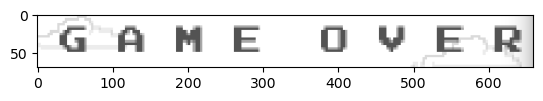

In [140]:
plt.imshow(np.array(env.get_done()))

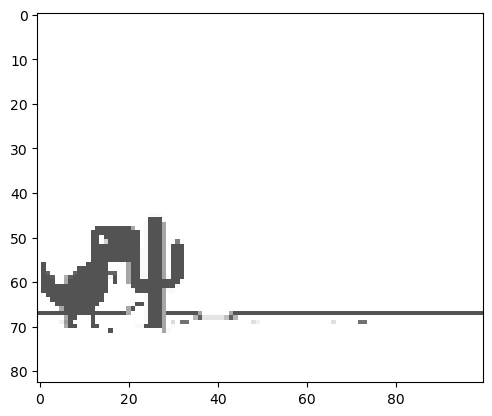

In [144]:
plt.imshow(cv2.cvtColor(env.get_observation()[0], cv2.COLOR_BGR2RGB))

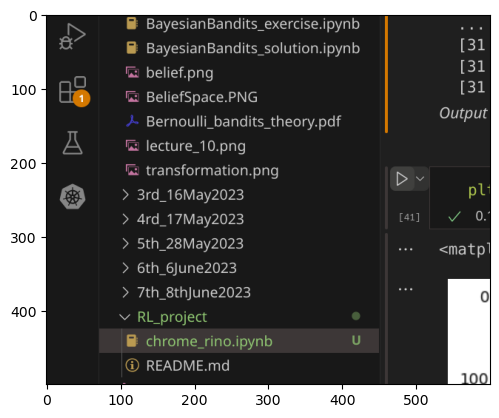

In [50]:
plt.imshow(env.get_observation())